### TIARA ANNISA DINA 
### 09011381722124
### SK 5 Unggulan
### Artificial Intelligence

# LOGIKA FUZZY MENGGUNAKAN METODE TSUKAMOTO UNTUK PREDIKSI PERILAKU KONSUMEN DI TOKO BANGUNAN

Para pedagang bahan bangunan sulit untuk menentukan barang apa yang harus dibeli untuk persediaan barang di gudang. Dalam menentukan persediaan barang di gudang dapat menggunakan cara melihat perilaku konsumen. Salah satu cara melihat perilaku konsumen yaitu dengan memprediksinya. Untuk itu perlu dibuat sistem untuk memprediksi perilaku konsumen. Di dalam penelitian ini akan dijelaskan bagaimana menerapkan logika fuzzy metode tsukamoto untuk memprediksi perilaku konsumen di toko bangunan. 

In [1]:
import numpy as np
import skfuzzy as fuz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

~numpy berguna untuk operasi vektor dan matriks

~skfuzzy (sci-kit fuzzy) merupakan bagian sci-kit learn berguna untuk mengoperasikan library untuk fuzzy

~matplotlib merupakan library berguna untuk menyajikan data ke dalam visual yang lebih baik dalam 2D atau 3D

# Fuzzification

untuk variabel input(antecedent) terdapat 3, yaitu :
1. semen -> sedikit (0-7), sedang (5-10), banyak ($\geq 10$)
2. pasir -> sedikit (0-0.5), sedang (0.25-1), banyak ($\geq 1$)
3. keramik -> sedikit (0-6), sedang (4-8), banyak ($\geq 8$)
   
   sedikit,sedang, banyak merupakan himpunan

untuk variabel output(consequent) terdapat 1, yaitu
1. renovasi lantai -> rendah (0-70), sedang (50-100), tinggi($\geq100$)

   rendah, sedang, tinggi merupakan himpunan

In [2]:
semen = ctrl.Antecedent (np.arange(0, 15, 1),'semen')
pasir = ctrl.Antecedent (np.arange(0, 2, 0.25),'pasir')
keramik = ctrl.Antecedent (np.arange(0, 15, 1),'keramik')

lantai = ctrl.Consequent(np.arange(0, 121, 1),'lantai')

#range/nilai akhir cth : 1 atau 0.25 berfungsi untuk menentukkan titik pada grafik dimulai dari 0 lalu ke 1 dst(tiap kelipatan) atau 0 lalu ke 0.25 dst(tiap kelipatan) 
#dua nilai awal dan tengah cth : 0, 15 atau 0, 2 berfungsi untuk menjelaskan range tiap variabel

In [3]:
semenn = np.arange(0, 15, 1)
pasirr = np.arange(0, 2, 0.25)
keramikk = np.arange(0, 15, 1)

lantaii = np.arange(0, 121, 1)

semen memiliki domain tertinggi sekitar lebih dari 10, jadi perkiraannya 15 untuk membuatnya menjadi grafik kontinu

pasir memiliki domain tertinggi sekitar lebih dari 1, jadi perkiraannya 2 untuk membuatnya menjadi grafik kontinu

keramik memiliki domain tertinggi sekitar lebih dari 8, jadi perkiraannya 15 untuk membuatnya menjadi grafik kontinu

lantai memiliki domain tertinggi sekitar lebih dari 100, jadi perkiraannya 121 untuk membuatnya menjadi grafik kontinu

# >> Variabel Semen 

variabel semen memiliki 3 fungsi keanggotaan seperti tabel dibawah ini: 
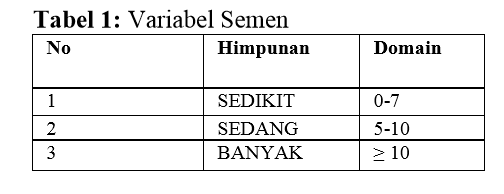

dengan persamaan berikut :

\begin{equation}
  semen['sedikit'] = \mu semen sedikit(x)=\begin{cases}
    1, & \text{$0\leq x \leq 5$}.\\
    \left.(7 - x) \,  \right/(7 - 5) , & \text{$5 \leq x \leq 7$}.\\
    0, & \text{$x\geq 7$}.
  \end{cases}
  \\
    semen['sedang'] = \mu semen sedang(x)=\begin{cases}
    0, & \text{$x\leq 5$ atau $x\geq 10$}.\\
    \left.(x - 5)\, \right/(7- 5) , & \text{$5 \leq x \leq 7$}.\\
    \left.(10 - x)\, \right/(10 - 7) , & \text{$7 \leq x \leq 10$}.\\
  \end{cases}
  \\
   semen['banyak'] = \mu semen banyak(x)=\begin{cases}
    0, & \text{$x \leq 7$}.\\
    \left.(x - 7) \,  \right/(10 - 7) , & \text{$7 \leq x \leq 10$}.\\
    1, & \text{$x\geq 10$}.
  \end{cases}
\end{equation}



dari persamaan diatas bisa digunakan untuk menentukan range nilai awal, nilai tengah, dan nilai akhir untuk setiap fungsi keanggotan. untuk nilai awal dan akhir gunakan [trapmf] untuk membuat grafik trapesium dan [trimf] pada nilai tengah untuk membuat grafik segitiga

In [4]:
semen ['sedikit'] = fuz.trapmf(semen.universe, [0, 0, 5, 7])
semen ['sedang'] = fuz.trimf(semen.universe, [5, 7, 10])
semen ['banyak'] = fuz.trapmf(semen.universe, [7, 10, 15, 15])

## >>> Plotting membership function [semen]

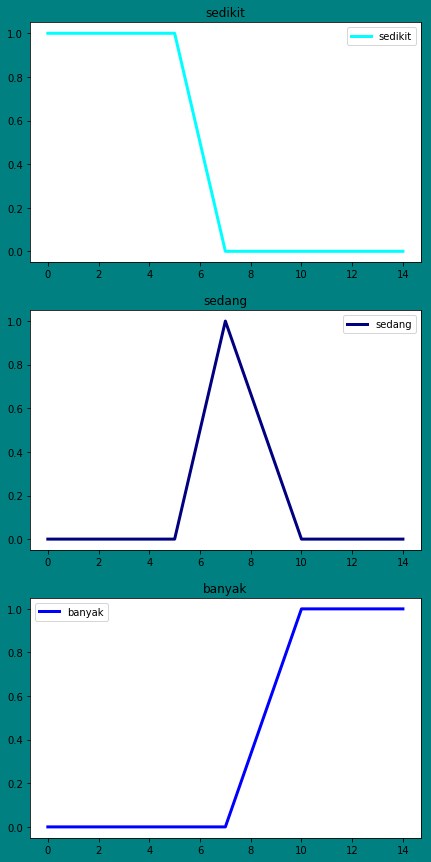

In [5]:
#menampilkan satu per satu grafik tiap fungsi keanggotaan
semen_sedikit = fuz.trapmf(semenn, [0, 0, 5, 7])
semen_sedang = fuz.trimf(semenn, [5, 7, 10])
semen_banyak = fuz.trapmf(semenn, [7, 10, 15, 15])
#beda codingan disini dan diatas adalah jika menggunakan universe (semesta) maka plot yang ditampilkan merupakan gabungan dari fungsi keanggotaan(mencakup)  

#terdiri dari 3 plot dengan p x l (7x15) 
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, facecolor='teal', figsize=(7, 15))
ax0.plot(semenn, semen_sedikit, 'cyan'  , linewidth = 3, label = 'sedikit')
ax1.plot(semenn, semen_sedang, 'navy'  , linewidth = 3, label = 'sedang')
ax2.plot(semenn, semen_banyak, 'blue'  , linewidth = 3, label = 'banyak')

ax0.set_title('sedikit')
ax1.set_title('sedang')
ax2.set_title('banyak')

ax0.legend()
ax1.legend()
ax2.legend()
#berguna untuk memberi tahu detail/penjelasan dari warna grafik tersebut

C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


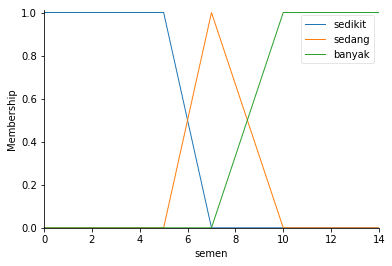

In [6]:
#menampilkan grafik gabungan tiap fungsi keanggotaan
semen.view()

# >>Variabel Pasir

variabel pasir memiliki 3 fungsi keanggotaan seperti tabel dibawah ini: 
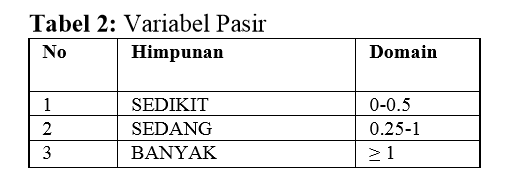

dengan persamaan sebagai berikut :

\begin{equation}
  pasir['sedikit'] = \mu pasir sedikit(x)=\begin{cases}
    1, & \text{$0\leq x \leq 0.25$}.\\
    \left.(0.5 - x) \,  \right/(0.5 - 0.25) , & \text{$0.25 \leq x \leq 0.5$}.\\
    0, & \text{$x\geq0.5$}.
  \end{cases}
  \\
    pasir['sedang'] = \mu pasir sedang(x)=\begin{cases}
    0, & \text{$x\leq 0.25$ atau $x\geq 1$}.\\
    \left.(x - 0.25)\, \right/(0.5- 0.25) , & \text{$0.25 \leq x \leq 0.5$}.\\
    \left.(1 - x)\, \right/(1 - 0.5) , & \text{$0.5 \leq x \leq 1$}.\\
  \end{cases}
  \\
   pasir['banyak'] = \mu pasir banyak(x)=\begin{cases}
    0, & \text{$x \leq 0.5$}.\\
    \left.(x - 0.5) \,  \right/(1 - 0.5) , & \text{$0.5 \leq x \leq 1$}.\\
    1, & \text{$x\geq 1$}.
  \end{cases}
\end{equation}


dari persamaan diatas bisa digunakan untuk menentukan range nilai awal, nilai tengah, dan nilai akhir untuk setiap fungsi keanggotan. untuk nilai awal dan akhir gunakan [trapmf] untuk membuat grafik trapesium dan [trimf] pada nilai tengah untuk membuat grafik segitiga

In [7]:
pasir ['sedikit'] = fuz.trapmf(pasir.universe, [0, 0, 0.25, 0.5])
pasir ['sedang'] = fuz.trimf(pasir.universe, [0.25, 0.5, 1])
pasir ['banyak'] = fuz.trapmf(pasir.universe, [0.5, 1, 2, 2])

## >>> Plotting membership function [pasir]

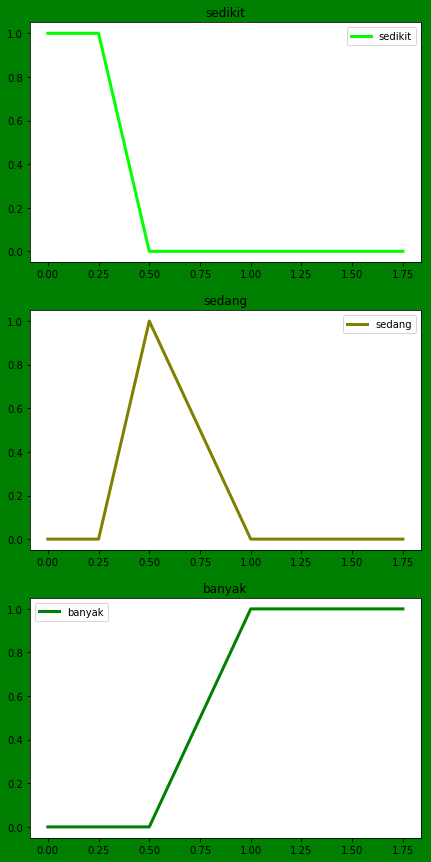

In [8]:
#menampilkan satu per satu grafik tiap fungsi keanggotaan
pasir_sedikit = fuz.trapmf(pasirr, [0, 0, 0.25, 0.5])
pasir_sedang = fuz.trimf(pasirr, [0.25, 0.5, 1])
pasir_banyak = fuz.trapmf(pasirr, [0.5, 1, 2, 2])

#terdiri dari 3 plot dengan p x l (7x15)
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, facecolor='g', figsize=(7, 15))
ax0.plot(pasirr, pasir_sedikit, 'lime'  , linewidth = 3, label = 'sedikit')
ax1.plot(pasirr, pasir_sedang, 'olive'  , linewidth = 3, label = 'sedang')
ax2.plot(pasirr, pasir_banyak, 'green'  , linewidth = 3, label = 'banyak')

ax0.set_title('sedikit')
ax1.set_title('sedang')
ax2.set_title('banyak')

ax0.legend()
ax1.legend()
ax2.legend()
#berguna untuk memberi tahu detail/penjelasan dari warna grafik tersebut

C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


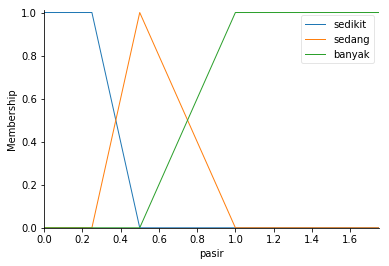

In [9]:
#menampilkan grafik gabungan tiap fungsi keanggotaan
pasir.view()

# >> Variabel Keramik

variabel keramik memiliki 3 fungsi keanggotaan seperti tabel dibawah ini: 
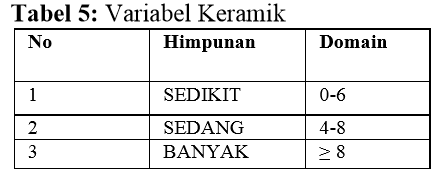

dengan persamaan sebagai berikut :

\begin{equation}
  keramik['sedikit'] = \mu keramik sedikit(x)=\begin{cases}
    1, & \text{$0\leq x \leq 4$}.\\
    \left.(6 - x) \,  \right/(6 - 4) , & \text{$4 \leq x \leq 6$}.\\
    0, & \text{$x\geq 6$}.
  \end{cases}
  \\
    keramik['sedang'] = \mu keramik sedang(x)=\begin{cases}
    0, & \text{$x\leq 4$ atau $x\geq 8$}.\\
    \left.(x - 4)\, \right/(6- 4) , & \text{$4 \leq x \leq 6$}.\\
    \left.(8 - x)\, \right/(8 - 6) , & \text{$6 \leq x \leq 8$}.\\
  \end{cases}
  \\
   keramik['banyak'] = \mu keramik banyak(x)=\begin{cases}
    0, & \text{$x \leq 6$}.\\
    \left.(x - 6) \,  \right/(8 - 6) , & \text{$6 \leq x \leq 8$}.\\
    1, & \text{$x\geq 8$}.
  \end{cases}
\end{equation}


dari persamaan diatas bisa digunakan untuk menentukan range nilai awal, nilai tengah, dan nilai akhir untuk setiap fungsi keanggotan. untuk nilai awal dan akhir gunakan [trapmf] untuk membuat grafik trapesium dan [trimf] pada nilai tengah untuk membuat grafik segitiga

In [10]:
keramik ['sedikit'] = fuz.trapmf(keramik.universe, [0, 0, 4, 6])
keramik ['sedang'] = fuz.trimf(keramik.universe, [4, 6, 8])
keramik ['banyak'] = fuz.trapmf(keramik.universe, [6, 8, 15, 15])

## >>> Plotting membership function [keramik]

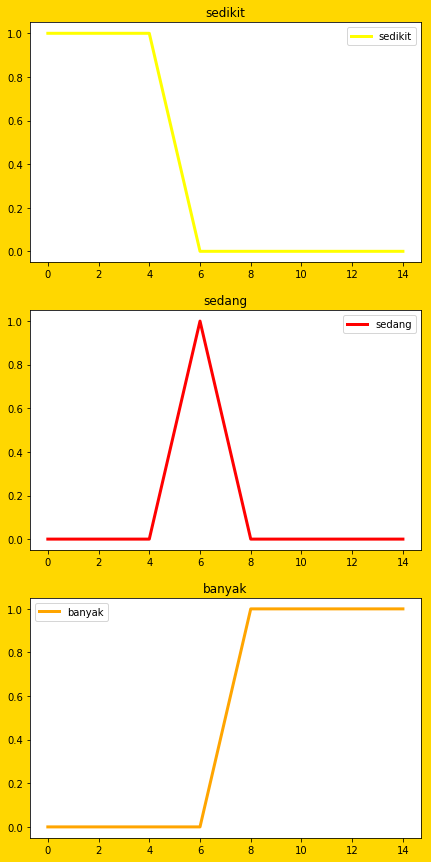

In [11]:
#menampilkan satu per satu grafik tiap fungsi keanggotaan
keramik_sedikit = fuz.trapmf(keramikk, [0, 0, 4, 6])
keramik_sedang = fuz.trimf(keramikk, [4, 6, 8])
keramik_banyak = fuz.trapmf(keramikk, [6, 8, 15, 15])

#terdiri dari 3 plot dengan p x l (7x15)
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, facecolor='gold', figsize=(7, 15))
ax0.plot(keramikk, keramik_sedikit, 'yellow'  , linewidth = 3, label = 'sedikit')
ax1.plot(keramikk, keramik_sedang, 'red'  , linewidth = 3, label = 'sedang')
ax2.plot(keramikk, keramik_banyak, 'orange'  , linewidth = 3, label = 'banyak')

ax0.set_title('sedikit')
ax1.set_title('sedang')
ax2.set_title('banyak')

ax0.legend()
ax1.legend()
ax2.legend()
#berguna untuk memberi tahu detail/penjelasan dari warna grafik tersebut

C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


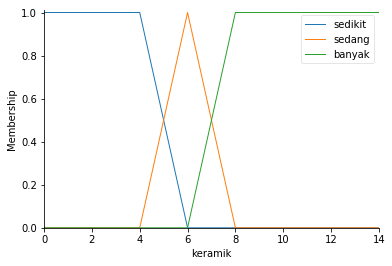

In [12]:
#menampilkan grafik gabungan tiap fungsi keanggotaan
keramik.view()

# > Variabel Output [Lantai]

variabel lantai memiliki 3 fungsi keanggotan, yaitu sebagai berikut :
1. rendah (0-70)
2. sedang (50-100)
3. tinggi ($\geq 100$)

dengan persamaan sebagai berikut : 

\begin{equation}
    lantai['rendah'] = \mu lantai rendah(x)=\begin{cases}
    1, & \text{$0 \leq x\leq 50$}.\\
    \left.(70 - x)\, \right/(70- 50) , & \text{$50 \leq x \leq 70$}.\\
    0, & \text{$x \geq 70$}.\\
  \end{cases}
  \\
   lantai['sedang'] = \mu lantai sedang(x)=\begin{cases}
    0, & \text{$x\leq 50$ atau $x\geq 100$}.\\
    \left.(x - 50)\, \right/(70- 50) , & \text{$50 \leq x \leq 70$}.\\
    \left.(100 - x)\, \right/(100 - 70) , & \text{$70 \leq x \leq 100$}.\\
  \end{cases}
  \\
   lantai['tinggi'] = \mu lantai tinggi(x)=\begin{cases}
    0, & \text{$x \leq 70$}.\\
    \left.(x - 100) \,  \right/(100 - 70) , & \text{$70 \leq x \leq 100$}.\\
    1, & \text{$x\geq 100$}.
  \end{cases}
\end{equation}


dari persamaan diatas bisa digunakan untuk menentukan range nilai awal, nilai tengah, dan nilai akhir untuk setiap fungsi keanggotan. untuk nilai awal dan akhir gunakan [trapmf] untuk membuat grafik trapesium dan [trimf] pada nilai tengah untuk membuat grafik segitiga

In [13]:
lantai['rendah'] =fuz.trapmf(lantai.universe, [0, 0, 50, 70])
lantai['sedang'] =fuz.trimf(lantai.universe, [50, 70, 100])
lantai['tinggi'] =fuz.trapmf(lantai.universe, [70, 100, 120, 120])

## >>> Plotting membership function [lantai]

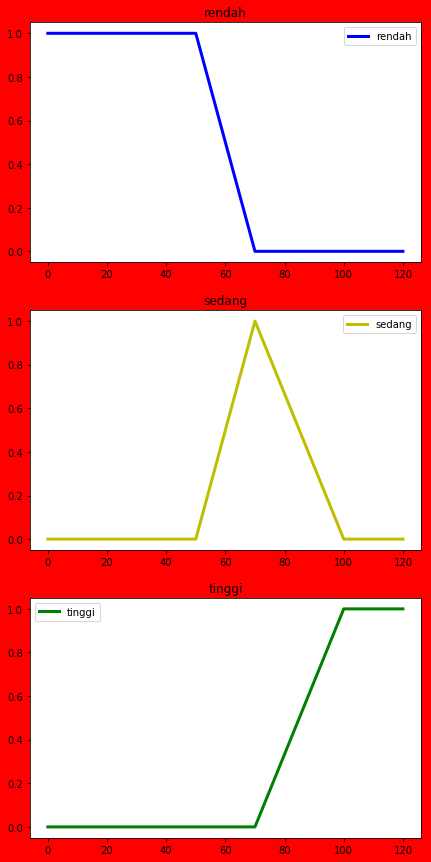

In [14]:
#menampilkan satu per satu grafik tiap fungsi keanggotaan
lantai_rendah =fuz.trapmf(lantaii, [0, 0, 50, 70])
lantai_sedang =fuz.trimf(lantaii, [50, 70, 100])
lantai_tinggi =fuz.trapmf(lantaii, [70, 100, 120, 120])

#terdiri dari 3 plot dengan p x l (7x15)
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, facecolor='red', figsize=(7, 15))
ax0.plot(lantaii, lantai_rendah, 'b', linewidth=3, label='rendah')
ax1.plot(lantaii, lantai_sedang, 'y', linewidth=3, label='sedang')
ax2.plot(lantaii, lantai_tinggi, 'g', linewidth=3, label='tinggi')

ax0.set_title('rendah')
ax1.set_title('sedang')
ax2.set_title('tinggi')

ax0.legend()
ax1.legend()
ax2.legend()
#berguna untuk memberi tahu detail/penjelasan dari warna grafik tersebut

C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


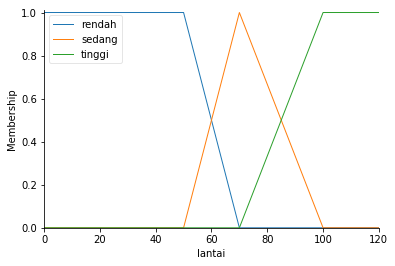

In [15]:
#menampilkan grafik gabungan tiap fungsi keanggotaan
lantai.view()

# Inferencing

pada sistem inferensi ini akan membuat beberapa rules dengan menggunakan IF THEN Rules digunakan untuk menyatakan kondisional fuzzy logic, yang secara umum berbentuk: if x adalah A then (maka) y adalah B 
 
Bagian “x adalah A”disebut antecedent atau premise,  sementara bagian  “y is B” dinamakan consequent atau conclusion. 

pada renovasi lantai terdapat 16 rule base seperti tabel dibawah ini :

|Rule|semen|pasir|keramik|lantai|
|----|-----|-----|-------|-------|
|Rule1|banyak|banyak|banyak|tinggi|
|Rule2|sedikit|sedikit|sedang|tinggi|
|Rule3|sedikit|sedang|sedikit|tinggi|
|Rule4|sedikit|sedang|sedang|tinggi|
|Rule5|sedikit|sedikit|banyak|tinggi|
|Rule6|sedang|banyak|sedang|tinggi|
|Rule7|sedikit|banyak|banyak|tinggi|
|Rule8|banyak|sedang|sedikit|tinggi|
|Rule9|sedikit|sedikit|sedikit|tinggi|
|Rule10|sedang|sedikit|sedang|tinggi|
|Rule11|sedang|sedang|sedikit|sedang|
|Rule12|sedikit|banyak|sedang|sedang|
|Rule13|sedang|banyak|sedikit|rendah|
|Rule14|banyak|sedang|sedikit|rendah|
|Rule15|sedikit|banyak|sedikit|rendah|
|Rule16|banyak|sedikit|sedikit|rendah|

In [16]:
rule1 = ctrl.Rule(semen ['banyak'] & pasir ['banyak'] & keramik ['banyak'], lantai ['tinggi'])
rule2 = ctrl.Rule(semen ['sedikit'] & pasir ['sedikit'] & keramik ['sedang'], lantai ['tinggi'])
rule3 = ctrl.Rule(semen ['sedikit'] & pasir ['sedang'] & keramik ['sedikit'], lantai ['tinggi'])
rule4 = ctrl.Rule(semen ['sedikit'] & pasir ['sedang'] & keramik ['sedang'], lantai ['tinggi'])
rule5 = ctrl.Rule(semen ['sedikit'] & pasir ['sedikit'] & keramik ['banyak'], lantai ['tinggi'])
rule6 = ctrl.Rule(semen ['sedang'] & pasir ['banyak'] & keramik ['sedang'], lantai ['tinggi'])
rule7 = ctrl.Rule(semen ['sedikit'] & pasir ['banyak'] & keramik ['banyak'], lantai ['tinggi'])
rule8 = ctrl.Rule(semen ['banyak'] & pasir ['sedang'] & keramik ['sedikit'], lantai ['tinggi'])
rule9 = ctrl.Rule(semen ['sedikit'] & pasir ['sedikit'] & keramik ['sedikit'], lantai ['tinggi'])
rule10 = ctrl.Rule(semen ['sedang'] & pasir ['sedikit'] & keramik ['sedang'], lantai ['tinggi'])
rule11 = ctrl.Rule(semen ['sedang'] & pasir ['sedang'] & keramik ['sedikit'], lantai ['sedang'])
rule12 = ctrl.Rule(semen ['sedikit'] & pasir ['banyak'] & keramik ['sedang'], lantai ['sedang'])
rule13 = ctrl.Rule(semen ['sedang'] & pasir ['banyak'] & keramik ['sedikit'], lantai ['rendah'])
rule14 = ctrl.Rule(semen ['banyak'] & pasir ['sedang'] & keramik ['sedikit'], lantai ['rendah'])
rule15 = ctrl.Rule(semen ['sedikit'] & pasir ['banyak'] & keramik ['sedikit'], lantai ['rendah'])
rule16 = ctrl.Rule(semen ['banyak'] & pasir ['sedikit'] & keramik ['sedikit'], lantai ['rendah'])

(<matplotlib.figure.Figure at 0x281b3c5f6a0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x281b3c87390>)

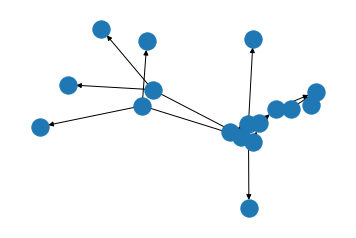

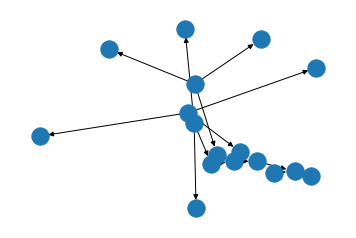

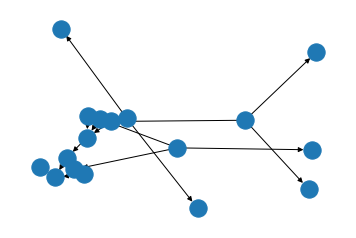

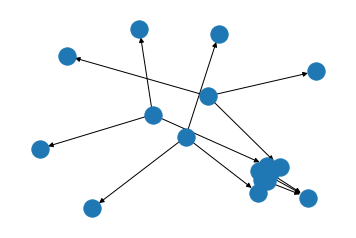

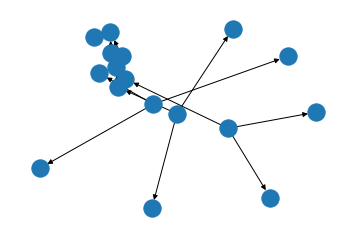

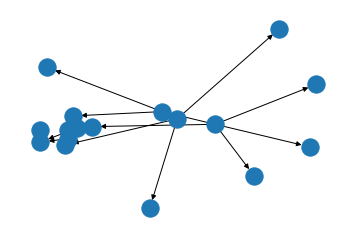

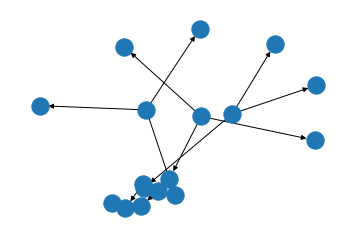

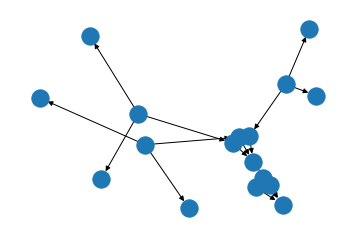

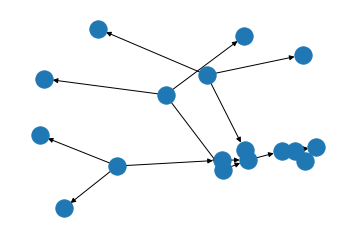

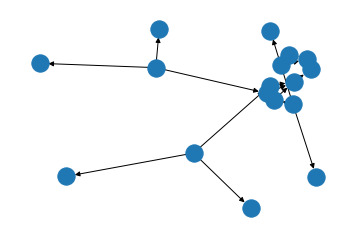

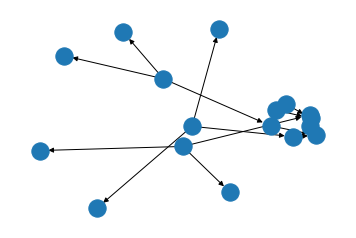

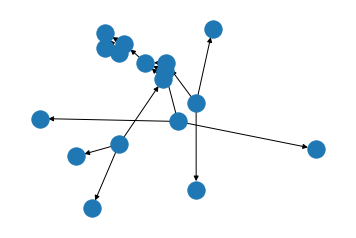

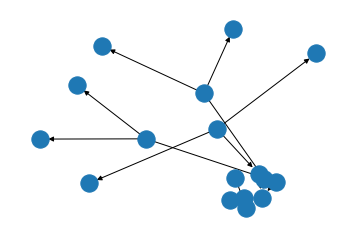

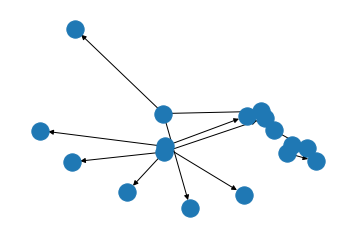

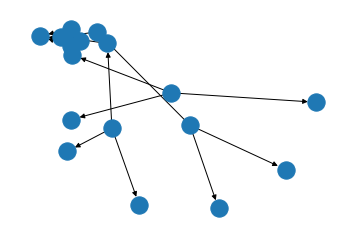

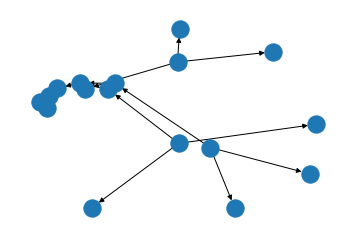

In [17]:
rule1.view()
rule2.view()
rule3.view()
rule4.view()
rule5.view()
rule6.view()
rule7.view()
rule8.view()
rule9.view()
rule10.view()
rule11.view()
rule12.view()
rule13.view()
rule14.view()
rule15.view()
rule16.view()

# Rule evaluation

In [18]:
#merangkup seluruh rule dan memasukkan dalam satu instruksi
renovasi_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15, rule16])

In [19]:
#menjadikkan instruksi diatas menjadi satu variabel/instruksi lebih simpel
renovasi = ctrl.ControlSystemSimulation(renovasi_ctrl)

# Defuzzification

In [20]:
#memasukkan nilai ke setiap input untuk dihitung
renovasi.input['semen'] = 6
renovasi.input['pasir'] = 0.8
renovasi.input['keramik'] = 7

In [21]:
#menghitung defuzzikasi
renovasi.compute()

C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


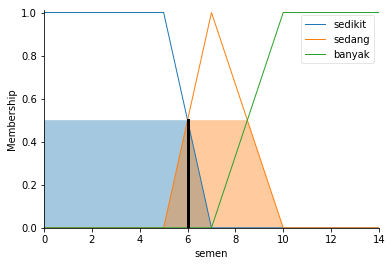

In [22]:
#menampilkan plot dari semen yang sudah di fill inputan
semen.view(sim=renovasi)

C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


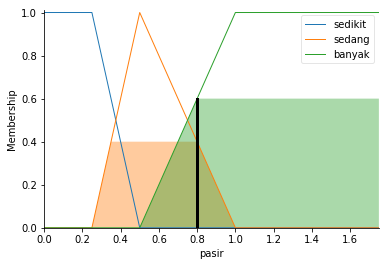

In [23]:
#menampilkan plot dari pasir yang sudah di fill inputan
pasir.view(sim=renovasi)

C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


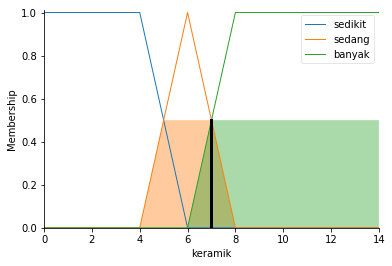

In [24]:
#menampilkan plot dari keramik yang sudah di fill inputan
keramik.view(sim=renovasi)

87.43589743589745


C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


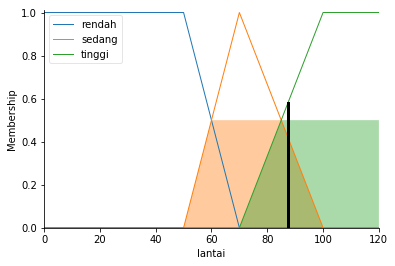

In [25]:
#menampilkan plot untuk renovasi lantai yang sudah dihitung secara defuzzikasi
print (renovasi.output['lantai'])
lantai.view(sim=renovasi)
#didapatkan akurasi sebesar 87.435%

# Perhitungan manual [Fuzzy Tsukamoto]

\begin{equation}
  semen = 6 \\ 
  semen['sedikit'] = \mu semen\,sedikit(x)=\begin{cases}
    1, & \text{$0\leq x \leq 5$}.\\
    \left.(7 - x) \,  \right/(7 - 5) , & \text{$5 \leq x \leq 7$}. \checkmark\\
    0, & \text{$x\geq 7$}.
  \end{cases}
  \\
    semen['sedang'] = \mu semen\,sedang(x)=\begin{cases}
    0, & \text{$x\leq 5$ atau $x\geq 10$}.\\
    \left.(x - 5)\, \right/(7- 5) , & \text{$5 \leq x \leq 7$}. \checkmark\\
    \left.(10 - x)\, \right/(10 - 7) , & \text{$7 \leq x \leq 10$}\\
  \end{cases}
  \\
   semen['banyak'] = \mu semen\,banyak(x)=\begin{cases}
    0, & \text{$x \leq 7$}.\\
    \left.(x - 7) \,  \right/(10 - 7) , & \text{$7 \leq x \leq 10$}.\\
    1, & \text{$x\geq 10$}.
  \end{cases}
\end{equation}

\begin{equation}
    \mu semen\,sedikit(6) = (7 - 6) / (7 - 5) \\
    \mu semen\,sedikit6) =  1/2 \\ 
    \mu semen\,sedikit(6) =  0.5\\
    \mu semen\,sedang(6) = (6 - 5) / (7 - 5) \\
    \mu semen\,sedang(6) = 1/2 \\
    \mu semen\,sedang(6) = 0.5 \\
\end{equation}

\begin{equation}
  pasir = 0.8\\  
  pasir['sedikit'] = \mu pasir sedikit(x)=\begin{cases}
    1, & \text{$0\leq x \leq 0.25$}.\\
    \left.(0.5 - x) \,  \right/(0.5 - 0.25) , & \text{$0.25 \leq x \leq 0.5$}.\\
    0, & \text{$x\geq $}.
  \end{cases}
  \\
    pasir['sedang'] = \mu pasir sedang(x)=\begin{cases}
    0, & \text{$x\leq 0.25$ atau $x\geq 1$}.\\
    \left.(x - 0.25)\, \right/(0.5- 0.25) , & \text{$0.25 \leq x \leq 0.5$}.\\
    \left.(1 - x)\, \right/(1 - 0.5) , & \text{$0.5 \leq x \leq 1$}. \checkmark\\
  \end{cases}
  \\
   pasir['banyak'] = \mu pasir banyak(x)=\begin{cases}
    0, & \text{$x \leq 0.5$}.\\
    \left.(x - 0.5) \,  \right/(1 - 0.5) , & \text{$0.5 \leq x \leq 1$}. \checkmark\\
    1, & \text{$x\geq 1$}. 
  \end{cases}
\end{equation}

\begin{equation}
    \mu pasir\,sedang(0.8) = (1 - 0.8) / (1 - 0.5) \\
    \mu pasir\,sedang(0.8) =  0.2/0.5 \\ 
    \mu pasir\,sedang(0.8) =  0.4\\
    \mu pasir\,banyak(0.8) = (0.8 - 0.5) / (1-0.5) \\
    \mu pasir\,banyak(0.8) = 0.3/0.5 \\
    \mu pasir\,banyak(0.8) = 0.6 \\
\end{equation}

\begin{equation}
  keramik = 7\\  
  keramik['sedikit'] = \mu keramik sedikit(x)=\begin{cases}
    1, & \text{$0\leq x \leq 4$}.\\
    \left.(6 - x) \,  \right/(6 - 4) , & \text{$4 \leq x \leq 6$}.\\
    0, & \text{$x\geq 6$}.
  \end{cases}
  \\
    keramik['sedang'] = \mu keramik sedang(x)=\begin{cases}
    0, & \text{$x\leq 4$ atau $x\geq 8$}.\\
    \left.(x - 4)\, \right/(6- 4) , & \text{$4 \leq x \leq 6$}.\\
    \left.(8 - x)\, \right/(8 - 6) , & \text{$6 \leq x \leq 8$}. \checkmark\\
  \end{cases}
  \\
   keramik['banyak'] = \mu keramik banyak(x)=\begin{cases}
    0, & \text{$x \leq 6$}.\\
    \left.(x - 6) \,  \right/(8 - 6) , & \text{$6 \leq x \leq 8$}. \checkmark\\
    1, & \text{$x\geq 8$}.
  \end{cases}
\end{equation}


\begin{equation}
    \mu keramik\,sedang(7) = (8 - 7) / (8 - 6) \\
    \mu keramik\,sedang(7) =  1/2 \\ 
    \mu keramik\,sedang(7) =  0.5\\
    \mu keramik\,banyak(7) = (7 - 6) / (8-6) \\
    \mu keramik\,banyak(7) = 1/2 \\
    \mu keramik\,banyak(7) = 0.5 \\
\end{equation}

Cari nilai Z untuk setiap rules dengan menggunakan fungsi MIN karena menggunakan rule multiple antecedent 

#1. IF semen banyak AND pasir banyak AND keramik banyak THEN lantai tinggi

$$\\ \alpha_1   = min (\mu semen banyak[6] ; \mu pasir banyak[0.8] ; \mu keramik banyak[7]) $$
$$ \alpha_1 = min (0; 0.6; 0.5) $$
$$ \alpha_1 = 0 $$

$$
   lantai['tinggi'] = \mu lantai tinggi(x)=\begin{cases}
    0, & \text{$x \leq 70$}.\\
    \left.(x - 100) \,  \right/(100 - 70) , & \text{$70 \leq x \leq 100$}.\\
    1, & \text{$x\geq 100$}.
  \end{cases}
 $$
 
 
nilai $ Z_1 = 0 $

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#2. IF semen sedikit AND pasir sedikit AND keramik sedang THEN lantai tinggi

$$\\ \alpha_2 = min (\mu semen sedikit[6] ; \mu pasir sedikit[0.8] ; \mu keramik sedang[7]) $$
$$ \alpha_2 = min (0.5; 0; 0.5) $$
$$ \alpha_2 = 0 $$

$$
   lantai['tinggi'] = \mu lantai tinggi(x)=\begin{cases}
    0, & \text{$x \leq 70$}.\\
    \left.(x - 100) \,  \right/(100 - 70) , & \text{$70 \leq x \leq 100$}.\\
    1, & \text{$x\geq 100$}.
  \end{cases}
$$

nilai $ Z_2 = 0 $

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#3. IF semen sedikit AND pasir sedang AND keramik sedikit THEN lantai tinggi

$$\\ \alpha_3 = min (\mu semen sedikit[6] ; \mu pasir sedang[0.8] ; \mu keramik sedikit[7]) $$
$$ \alpha_3 = min (0.5; 0.4; 0) $$
$$ \alpha_3 = 0 $$

$$
  lantai['tinggi'] = \mu lantai tinggi(x)=\begin{cases}
    0, & \text{$x \leq 70$}.\\
    \left.(x - 100) \,  \right/(100 - 70) , & \text{$70 \leq x \leq 100$}.\\
    1, & \text{$x\geq 100$}.
  \end{cases}
$$

nilai $ Z_3 = 0 $

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#4. IF semen sedikit AND pasir sedang AND keramik sedang THEN lantai tinggi

$$\\ \alpha_4 = min (\mu semen sedikit[6] ; \mu pasir sedang[0.8] ; \mu keramik sedang[7]) $$
$$ \alpha_4 = min (0.5; 0.4; 0.5) $$
$$ \alpha_4 = 0.4 $$

$$ 
    lantai['tinggi'] = \mu lantai tinggi(x)=\begin{cases}
    0, & \text{$x \leq 70$}.\\
    \left.(x - 100) \,  \right/(100 - 70) , & \text{$70 \leq x \leq 100$}.\\
    1, & \text{$x\geq 100$}.
  \end{cases}
$$

 $$ (Zmax - Z_4) / (Zmax - Zmin) = \alpha_4 $$
 $$(100- Z_4) / (100 - 70) = 0.4 $$
 $$ 100 - Z_4 = 0.4 \times 30 $$
 $$ 100 - Z_4 = 12 $$
 $$ Z_4 = 88 $$

nilai $ Z_4 = 88 $

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#5. IF semen sedikit AND pasir sedikit AND keramik banyak THEN lantai tinggi

$$\\ \alpha_5 = min (\mu semen sedikit[6] ; \mu pasir sedikit[0.8] ; \mu keramik banyak[7]) $$
$$ \alpha_5 = min (0.5; 0; 0.5) $$
$$ \alpha_5 = 0 $$

$$
    lantai['tinggi'] = \mu lantai tinggi(x)=\begin{cases}
    0, & \text{$x \leq 70$}.\\
    \left.(x - 100) \,  \right/(100 - 70) , & \text{$70 \leq x \leq 100$}.\\
    1, & \text{$x\geq 100$}.
  \end{cases}
$$

nilai $Z_5 = 0 $

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#6. IF semen sedang AND pasir banyak AND keramik sedang THEN lantai tinggi

$$\\ \alpha_6 = min (\mu semen sedang[6] ; \mu pasir banyak[0.8] ; \mu keramik sedang[7]) $$
$$ \alpha_6 = min (0.5; 0.6; 0.5) $$
$$ \alpha_6 = 0.5 $$

$$
    lantai['tinggi'] = \mu lantai tinggi(x)=\begin{cases}
    0, & \text{$x \leq 70$}.\\
    \left.(x - 100) \,  \right/(100 - 70) , & \text{$70 \leq x \leq 100$}.\\
    1, & \text{$x\geq 100$}.
  \end{cases}
$$

 $$ (Zmax - Z_6) / (Zmax - Zmin) = \alpha_6 $$
 $$(100- Z_6) / (100 - 70) = 0.5 $$
 $$ 100 - Z_6 = 0.5 \times 30 $$
 $$ 100 - Z_6 = 15 $$
 $$ Z_6 = 85 $$
 
nilai $ Z_6 = 85 $

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#7. IF semen sedikit AND pasir banyak AND keramik banyak THEN lantai tinggi

$$\\ \alpha_7 = min (\mu semen sedikit[6] ; \mu pasir banyak[0.8] ; \mu keramik banyak[7]) $$
$$ \alpha_7 = min (0.5; 0.6; 0.5) $$
$$ \alpha_7 = 0.5 $$

$$
    lantai['tinggi'] = \mu lantai tinggi(x)=\begin{cases}
    0, & \text{$x \leq 70$}.\\
    \left.(x - 100) \,  \right/(100 - 70) , & \text{$70 \leq x \leq 100$}.\\
    1, & \text{$x\geq 100$}.
  \end{cases}
$$

 $$ (Zmax - Z_7) / (Zmax - Zmin) = \alpha_7 $$
 $$(100- Z_7) / (100 - 70) = 0.5 $$
 $$ 100 - Z_7 = 0.5 \times 30 $$
 $$ 100 - Z_7 = 15 $$
 $$ Z_7 = 85 $$
 
nilai $ Z_7 = 85 $

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#8. IF semen banyak AND pasir sedang AND keramik sedikit THEN lantai tinggi

$$\\ \alpha_8 = min (\mu semen banyak[6] ; \mu pasir sedang[0.8] ; \mu keramik sedikit[7]) $$
$$ \alpha_8 = min (0; 0.4; 0) $$
$$ \alpha_8 = 0 $$

$$
    lantai['tinggi'] = \mu lantai tinggi(x)=\begin{cases}
    0, & \text{$x \leq 70$}.\\
    \left.(x - 100) \,  \right/(100 - 70) , & \text{$70 \leq x \leq 100$}.\\
    1, & \text{$x\geq 100$}.
  \end{cases}
$$

nilai $ Z_8 = 0 $

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#9. IF semen sedikit AND pasir sedikit AND keramik sedikit THEN lantai tinggi

$$\\ \alpha_9 = min (\mu semen sedikit[6] ; \mu pasir sedikit[0.8] ; \mu keramik sedikit[7]) $$
$$ \alpha_9 = min (0.5; 0; 0) $$
$$ \alpha_9 = 0 $$

$$
    lantai['tinggi'] = \mu lantai tinggi(x)=\begin{cases}
    0, & \text{$x \leq 70$}.\\
    \left.(x - 100) \,  \right/(100 - 70) , & \text{$70 \leq x \leq 100$}.\\
    1, & \text{$x\geq 100$}.
  \end{cases}
$$

nilai  $Z_9 = 0 $

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#10. IF semen sedang AND pasir sedikit AND keramik sedang THEN lantai tinggi

$$\\ \alpha_1\,_0 = min (\mu semen sedang[6] ; \mu pasir sedikit[0.8] ; \mu keramik sedang[7]) $$
$$ \alpha_1\,_0 = min (0.5; 0; 0,5) $$
$$ \alpha_1\,_0 = 0 $$

$$
    lantai['tinggi'] = \mu lantai tinggi(x)=\begin{cases}
    0, & \text{$x \leq 70$}.\\
    \left.(x - 100) \,  \right/(100 - 70) , & \text{$70 \leq x \leq 100$}.\\
    1, & \text{$x\geq 100$}.
  \end{cases}
$$

nilai $ Z_1$$_0$ = 0 

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#11. IF semen sedang AND pasir sedang AND keramik sedikit THEN lantai sedang

$$\\ \alpha_1\,_1 = min (\mu semen sedang[6] ; \mu pasir sedang[0.8] ; \mu keramik sedikit[7]) $$
$$ \alpha_1\,_1 = min (0.5; 0.4; 0) $$
$$ \alpha_1\,_1 = 0 $$

$$
    lantai['sedang'] = \mu lantai sedang(x)=\begin{cases}
    0, & \text{$x\leq 50$ atau $x\geq 100$}.\\
    \left.(x - 50)\, \right/(70- 50) , & \text{$50 \leq x \leq 7$}.\\
    \left.(100 - x)\, \right/(100 - 70) , & \text{$70 \leq x \leq 100$}.\\
  \end{cases}
$$

nilai $ Z_1$$_1$ = 0

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#12. IF semen sedikit AND pasir banyak AND keramik sedang THEN lantai sedang

$$\\ \alpha_1\,_2 = min (\mu semen sedikit[6] ; \mu pasir banyak[0.8] ; \mu keramik sedang[7]) $$
$$ \alpha_1\,_2 = min (0.5; 0.6; 0.5) $$
$$ \alpha_1\,_2 = 0.5 $$

$$
    lantai['sedang'] = \mu lantai sedang(x)=\begin{cases}
    0, & \text{$x\leq 50$ atau $x\geq 100$}.\\
    \left.(x - 50)\, \right/(70- 50) , & \text{$50 \leq x \leq 7$}.\\
    \left.(100 - x)\, \right/(100 - 70) , & \text{$70 \leq x \leq 100$}.\\
  \end{cases}
$$

 $$ (Zmax - Z_1\,_2) / (Zmax - Zmin) = \alpha_1\,_2 $$
 $$(100- Z_1\,_2) / (100 - 70) = 0.5 $$
 $$ 100 - Z_1\,_2 = 0.5 \times 30 $$
 $$ 100 - Z_1\,_2 = 15 $$
 $$ Z_1\,_2 = 85 $$

nilai $ Z_1$$_2$ = 85

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#13. IF semen sedang AND pasir banyak AND keramik sedikit THEN lantai rendah

$$\\ \alpha_1\,_3 = min (\mu semen sedang[6] ; \mu pasir banyak[0.8] ; \mu keramik sedikit[7]) $$
$$ \alpha_1\,_3 = min (0.5; 0.6; 0) $$
$$ \alpha_1\,_3 = 0 $$

$$
    lantai['rendah'] = \mu lantai rendah(x)=\begin{cases}
    1, & \text{$0 \leq x\leq 50$}.\\
    \left.(70 - x)\, \right/(70- 50) , & \text{$50 \leq x \leq 70$}.\\
    0, & \text{$x \geq 70$}.\\
  \end{cases}
$$

nilai $ Z_1$$_3$ = 0

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#14. IF semen banyak AND pasir sedang AND keramik sedikit THEN lantai rendah

$$\\ \alpha_1\,_4 = min (\mu semen banyak[6] ; \mu pasir sedang[0.8] ; \mu keramik sedikit[7]) $$
$$ \alpha_1\,_4 = min (0; 0.4; 0) $$
$$ \alpha_1\,_4 = 0 $$

$$
    lantai['rendah'] = \mu lantai rendah(x)=\begin{cases}
    1, & \text{$0 \leq x\leq 50$}.\\
    \left.(70 - x)\, \right/(70- 50) , & \text{$50 \leq x \leq 70$}.\\
    0, & \text{$x \geq 70$}.\\
  \end{cases}
$$

nilai $ Z_1$$_4$ = 0

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#15. IF semen sedikit AND pasir banyak AND keramik sedikit THEN lantai rendah

$$\\ \alpha_1\,_5 = min (\mu semen sedikit[6] ; \mu pasir banyak[0.8] ; \mu keramik sedikit[7]) $$
$$ \alpha_1\,_5 = min (0.5; 0.6; 0) $$
$$ \alpha_1\,_5 = 0 $$

$$
    lantai['rendah'] = \mu lantai rendah(x)=\begin{cases}
    1, & \text{$0 \leq x\leq 50$}.\\
    \left.(70 - x)\, \right/(70- 50) , & \text{$50 \leq x \leq 70$}.\\
    0, & \text{$x \geq 70$}.\\
  \end{cases}
$$

nilai $ Z_1$$_5$ = 0

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#16. IF semen banyak AND pasir sedikit AND keramik sedikit THEN lantai rendah

$$\\ \alpha_1\,_6 = min (\mu semen banyak[6] ; \mu pasir sedikit[0.8] ; \mu keramik sedikit[7]) $$
$$ \alpha_1\,_6 = min (0; 0; 0) $$
$$ \alpha_1\,_6 = 0 $$

$$
    lantai['rendah'] = \mu lantai rendah(x)=\begin{cases}
    1, & \text{$0 \leq x\leq 50$}.\\
    \left.(70 - x)\, \right/(70- 50) , & \text{$50 \leq x \leq 70$}.\\
    0, & \text{$x \geq 70$}.\\
  \end{cases}
$$

nilai $ Z_1$$_6$ = 0

$ Z =$$$ \frac{\alpha_1 \times Z_1 +
\alpha_2 \times Z_2 +
\alpha_3 \times Z_3 +
\alpha_4 \times Z_4 +
\alpha_5 \times Z_5 +
\alpha_6 \times Z_6 +
\alpha_7 \times Z_7 +
\alpha_8 \times Z_8 +
\alpha_9 \times Z_9 +
\alpha_1\,_0 \times Z_1\,_0 +
\alpha_1\,_1 \times Z_1\,_1 +
\alpha_1\,_2 \times Z_1\,_2 +
\alpha_1\,_3 \times Z_1\,_3 +
\alpha_1\,_4 \times Z_1\,_4 +
\alpha_1\,_5 \times Z_1\,_5 +
\alpha_1\,_6 \times Z_1\,_6}
{\alpha_1 + \alpha_2 +
\alpha _3 + \alpha_4 +
\alpha_5 + \alpha_6 +
\alpha_7 + \alpha_8 +
\alpha_9 + \alpha_1\,_0 +
\alpha_1\,_1 + \alpha_1\,_2
+\alpha_1\,_3 +\alpha_1\,_4 +\alpha_1\,_5
+\alpha_1\,_6}$$

 $$Z = \frac{0+0+0+0.4 \times 88+0+0.5 \times 85+0.5 \times 85+0+0+0+0+0.5 \times 85+0+0+0+0}{0+0+0+0.4+0+0.5+0.5+0+0+0+0+0.5+0+0+0+0} $$
 
 $$ Z = \frac{35.2 + 127.5}{1.9} $$
 $$ Z = 85.631 $$
 
 berdasarkan perhitungan manual didapatkan akurasi sebesar 85.361%
 
 selisih/nilai error antara perhitungan manual dengan python adalah sebesar 2.063%

# Referensi paper

[LOGIKA FUZZY MENGGUNAKAN METODE TSUKAMOTO UNTUK PREDIKSI PERILAKU KONSUMEN DI TOKO BANGUNAN ](http://publikasi.dinus.ac.id/index.php/technoc/article/view/970)